In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [44]:
df['userid'].nunique()

90189

In [45]:
df.groupby('version')['userid'].nunique()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

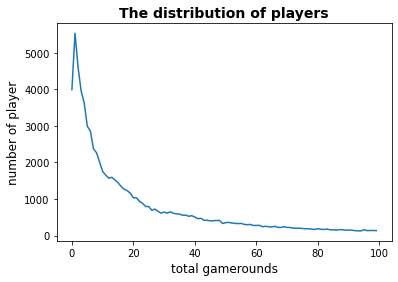

In [46]:
c_g = df.groupby('sum_gamerounds')['userid'].count()
ax = c_g.head(100).plot()
plt.title("The distribution of players", fontweight="bold", size=14)
plt.xlabel("total gamerounds", size=12)
plt.ylabel("number of player", size=12)
plt.show()

In [47]:
print(round(df['retention_1'].mean()*100, 2))
print(round(df['retention_7'].mean()*100, 2))

44.52
18.61


In [48]:
df_version_gb = df.groupby('version').agg({'userid':'count', 'retention_1':'mean', 'retention_7':'mean', 'sum_gamerounds':'sum'})
df_version_gb

,userid,retention_1,retention_7,sum_gamerounds
version,,,,
gate_30,44700,0.448188,0.190201,2344795
gate_40,45489,0.442283,0.182000,2333530


In [53]:
bs_1d = []
bs_7d = []

for i in range(5000):
    bs_mean_1 = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    bs_mean_7 = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()

    bs_1d.append(bs_mean_1)
    bs_7d.append(bs_mean_7)

In [54]:
boot_1d = pd.DataFrame(bs_1d)
boot_7d = pd.DataFrame(bs_7d)


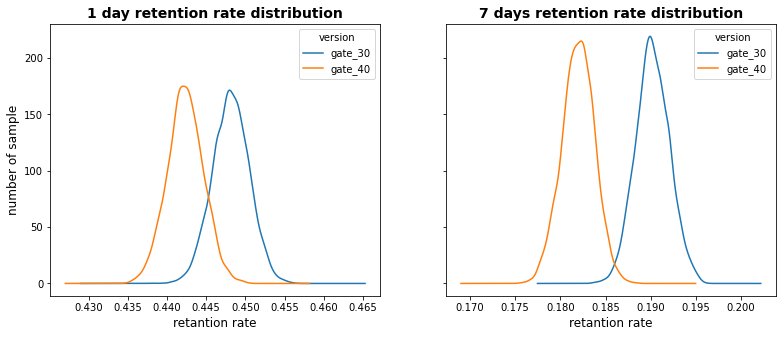

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(13,5))
boot_1d.plot.kde(ax=ax1)
ax1.set_xlabel("retantion rate",size=12)
ax1.set_ylabel("number of sample",size=12)
ax1.set_title("1 day retention rate distribution", fontweight="bold",size=14)


boot_7d.plot.kde(ax=ax2)
ax2.set_xlabel("retantion rate",size=12)
ax2.set_title("7 days retention rate distribution", fontweight="bold",size=14)

plt.show()

In [56]:
boot_1d.head()

version,gate_30,gate_40
retention_1,0.447272,0.442350
retention_1,0.449107,0.441531
retention_1,0.449390,0.437684
retention_1,0.448520,0.442902
retention_1,0.446044,0.446978


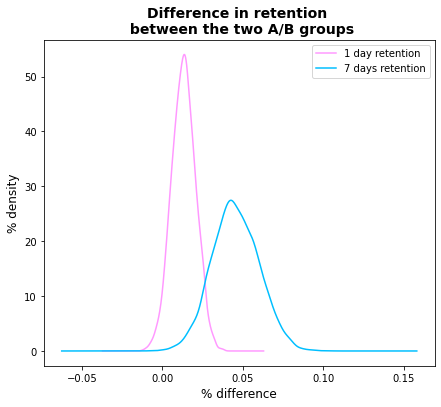

In [68]:
boot_1d['diff'] = ((boot_1d['gate_30'] - boot_1d['gate_40'])/ boot_1d['gate_40'])
boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40'])/ boot_7d['gate_40'])


fig ,(ax1) = plt.subplots(1, 1, figsize=(7, 6))

boot_1d['diff'].plot.kde(ax=ax1, c="#ff99ff", label = "1 day retention")
boot_7d['diff'].plot.kde(ax=ax1, c= "#00bfff", label = "7 days retention")
ax1.set_xlabel("% difference",size=12)
ax1.set_ylabel("% density",size=12)
ax1.set_title("Difference in retention \n between the two A/B groups", fontweight="bold", size=14)
plt.legend()
plt.show()

In [70]:

prob_1 = (boot_1d['diff']>0).sum()/len(boot_1d['diff'])

prob_7 = (boot_7d['diff']>0).sum()/len(boot_7d['diff'])

print(f"The probability that 1-day retention is greater when the gate is at level 30: {round(prob_1,2)*100}% \
      \nThe probability that 7-days retention is greater when the gate is at level 30: {(prob_7)*100}% ")

The probability that 1-day retention is greater when the gate is at level 30: 96.0%       
The probability that 7-days retention is greater when the gate is at level 30: 99.94% 
